# **Eksplorasi Data & Data Pre-processing**

## **Eksplorasi Data: Memahami Data dengan Statistik**

In [2]:
import pandas as pd

dataset = pd.read_csv('./Dataset/online_raw.csv')

print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False

[5 rows x 18 columns]

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Durati

In [3]:
dataset_corr = dataset.corr()

print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())

print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  Administrative_Duration  ...  \
Administrative                 1.000000                 0.601466  ...   
Administrative_Duration        0.601466                 1.000000  ...   
Informational                  0.376782                 0.302647  ...   
Informational_Duration         0.255757                 0.237959  ...   
ProductRelated                 0.430832                 0.288869  ...   
ProductRelated_Duration        0.373647                 0.355238  ...   
BounceRates                   -0.223474                -0.144128  ...   
ExitRates                     -0.316192                -0.205618  ...   
PageValues                     0.098771                 0.067463  ...   
SpecialDay                    -0.095054                -0.073472  ...   
OperatingSystems              -0.006459                -0.007425  ...   
Browser                       -0.025243                -0.015525  ...   
Region                        -0

## **Eksplorasi Data: Memahami Data dengan Visual**

/home/halim/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/halim/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



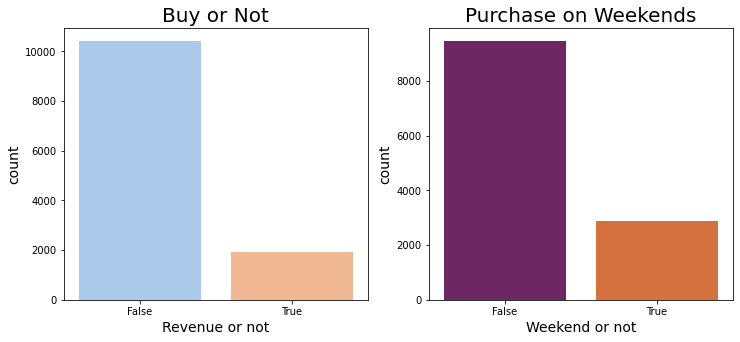

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

In [17]:
import plotly.express as px

fig = px.histogram(dataset['Region'], )
fig.show()

## **Data Pre-processing: Handling Missing Value - Part 1**

In [18]:
#checking missing value for each feature
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


In [ ]:
#Drop rows with missing value
dataset_clean = dataset.dropna()
print('Ukuran dataset_clean:', dataset_clean.shape)

Ukuran dataset_clean: (12316, 18)


Imputing missing value sangat mudah dilakukan di Python, cukup memanfaatkan fungsi .fillna() dan .mean() dari Pandas, seperti berikut:

In [19]:
print("Before imputation:")
# Checking missing value for each feature
print(dataset.isnull().sum())
# Counting total missing value
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature
print(dataset.isnull().sum())
# Counting total missing value
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

/tmp/ipykernel_13190/1052460172.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



## **Data Preprocessing: Scaling**

In [20]:
from sklearn.preprocessing import MinMaxScaler
#Define MinMaxScaler as scaler
scaler = MinMaxScaler()
#list all the feature that need to be scaled
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


## **Data Pre-processing: Konversi string ke numerik**

In [21]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


# **Pemodelan dengan Scikit-Learn**

## **Features & Label**

Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Revenue] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset.

In [22]:
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


## **Training dan Test Dataset**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


## **Training Model: Fit**

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

## **Training Model: Predict**

In [25]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


## **Evaluasi Model Performance**
Untuk menampilkan confusion matrix cukup menggunakan fungsi confusion_matrix() dari Scikit-Learn

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8584752635847527

Confusion matrix:
[[1873  171]
 [ 178  244]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2044
        True       0.59      0.58      0.58       422

    accuracy                           0.86      2466
   macro avg       0.75      0.75      0.75      2466
weighted avg       0.86      0.86      0.86      2466



# **Pemodelan Permasalahan Klasifikasi dengan Logistic Regression**


Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('\nClassification report')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8584752635847527

Confusion matrix
[[2009   35]
 [ 315  107]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/home/halim/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## **Classification - Decision Tree**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train,y_train)

print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8613138686131386


## **Regression: Linear Regression**

In [36]:
import pandas as pd

housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')

from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])

X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


## **Regression Performance Evaluation**

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


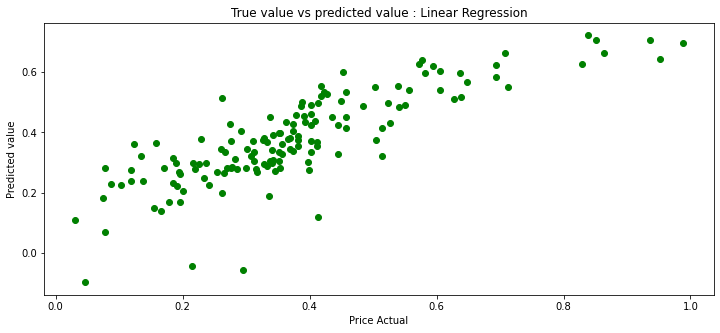

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)

rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

## **K-Means Clustering**

In [38]:
import pandas as pd
from sklearn.cluster import KMeans

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')

X = dataset[['annual_income','spending_score']]

cluster_model = KMeans(n_clusters = 5, random_state = 24)
labels = cluster_model.fit_predict(X)

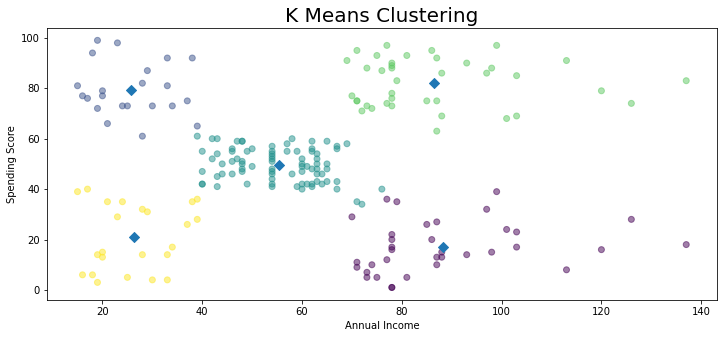

In [39]:
import matplotlib.pyplot as plt

X = X.values
xs = X[:,0]
ys = X[:,1]

plt.scatter(xs,ys,c=labels, alpha=0.5)

centroids = cluster_model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## **Measuring Cluster Criteria**

In [56]:
from sklearn.cluster import KMeans
import plotly.express as px

inertia = []

for k in range(1, 10):
  cluster_model = KMeans(n_clusters = k, random_state = 24)
  cluster_model.fit(X)
  inertia_value = cluster_model.inertia_
  inertia.append(inertia_value)

df = range(1,10)
fig = px.line(df, inertia, labels=dict(x="No. of Clusters", y="inertia"))
fig.show()